<h1><b>SIGNS手势数据集的卷积神经网络识别

In [42]:
import tensorflow as tf
import h5py
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
from tensorflow.keras import datasets, layers, models
import numpy as np
import math

In [52]:
def convert_to_one_hot(Y, C):
    """
    将目标值转换成one_hot编码
    :param Y:
    :param C:
    :return:
    """
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

**加载数据**

In [18]:
train_dataset = h5py.File('./data/signs/train_signs.h5', "r")

In [19]:
train_dataset

<HDF5 file "train_signs.h5" (mode r)>

In [20]:
X_train_orig = np.array(train_dataset["train_set_x"][:])
Y_train_orig = np.array(train_dataset["train_set_y"][:])

In [21]:
X_train_orig

array([[[[227, 220, 214],
         [227, 221, 215],
         [227, 222, 215],
         ...,
         [232, 230, 224],
         [231, 229, 222],
         [230, 229, 221]],

        [[227, 221, 214],
         [227, 221, 215],
         [228, 221, 215],
         ...,
         [232, 230, 224],
         [231, 229, 222],
         [231, 229, 221]],

        [[227, 221, 214],
         [227, 221, 214],
         [227, 221, 215],
         ...,
         [232, 230, 224],
         [231, 229, 223],
         [230, 229, 221]],

        ...,

        [[119,  81,  51],
         [124,  85,  55],
         [127,  87,  58],
         ...,
         [210, 211, 211],
         [211, 212, 210],
         [210, 211, 210]],

        [[119,  79,  51],
         [124,  84,  55],
         [126,  85,  56],
         ...,
         [210, 211, 210],
         [210, 211, 210],
         [209, 210, 209]],

        [[119,  81,  51],
         [123,  83,  55],
         [122,  82,  54],
         ...,
         [209, 210, 210],
        

In [22]:
X_train_orig.shape

(1080, 64, 64, 3)

In [23]:
Y_train_orig

array([5, 0, 2, ..., 2, 4, 5])

In [24]:
Y_train_orig.shape

(1080,)

In [25]:
test_dataset = h5py.File('./data/signs/test_signs.h5', "r")
X_test_orig = np.array(test_dataset["test_set_x"][:])
Y_test_orig = np.array(test_dataset["test_set_y"][:])

In [26]:
Y_train_orig = Y_train_orig.reshape((1, Y_train_orig.shape[0]))
Y_test_orig = Y_test_orig.reshape((1, Y_test_orig.shape[0]))
X_train = X_train_orig / 255.
X_test = X_test_orig / 255.

In [28]:
X_train

array([[[[0.89019608, 0.8627451 , 0.83921569],
         [0.89019608, 0.86666667, 0.84313725],
         [0.89019608, 0.87058824, 0.84313725],
         ...,
         [0.90980392, 0.90196078, 0.87843137],
         [0.90588235, 0.89803922, 0.87058824],
         [0.90196078, 0.89803922, 0.86666667]],

        [[0.89019608, 0.86666667, 0.83921569],
         [0.89019608, 0.86666667, 0.84313725],
         [0.89411765, 0.86666667, 0.84313725],
         ...,
         [0.90980392, 0.90196078, 0.87843137],
         [0.90588235, 0.89803922, 0.87058824],
         [0.90588235, 0.89803922, 0.86666667]],

        [[0.89019608, 0.86666667, 0.83921569],
         [0.89019608, 0.86666667, 0.83921569],
         [0.89019608, 0.86666667, 0.84313725],
         ...,
         [0.90980392, 0.90196078, 0.87843137],
         [0.90588235, 0.89803922, 0.8745098 ],
         [0.90196078, 0.89803922, 0.86666667]],

        ...,

        [[0.46666667, 0.31764706, 0.2       ],
         [0.48627451, 0.33333333, 0.21568627]

In [29]:
X_train.shape

(1080, 64, 64, 3)

In [30]:
X_test.shape

(120, 64, 64, 3)

In [57]:
#Y_train = convert_to_one_hot(Y_train_orig, 6).T
#Y_test = convert_to_one_hot(Y_test_orig, 6).T
Y_train = Y_train_orig
Y_test = Y_test_orig

In [59]:
Y_train

array([[5, 0, 2, ..., 2, 4, 5]])

In [60]:
Y_train = Y_train.flatten()

In [61]:
Y_train

array([5, 0, 2, ..., 2, 4, 5])

In [63]:
Y_train.shape

(1080,)

In [65]:
Y_test = Y_test.flatten()
Y_test

array([0, 0, 0, 5, 1, 0, 3, 1, 5, 1, 5, 1, 3, 1, 1, 3, 5, 4, 0, 4, 5, 4,
       2, 5, 3, 5, 4, 2, 1, 2, 3, 1, 0, 3, 1, 1, 0, 4, 2, 3, 0, 3, 0, 2,
       3, 1, 2, 2, 0, 3, 4, 1, 2, 0, 4, 0, 4, 0, 4, 4, 5, 5, 2, 4, 4, 5,
       0, 1, 3, 5, 0, 4, 1, 2, 3, 4, 3, 5, 1, 5, 2, 0, 1, 4, 2, 4, 4, 1,
       4, 5, 5, 0, 0, 5, 5, 5, 3, 3, 5, 2, 2, 2, 0, 2, 5, 3, 0, 2, 3, 4,
       1, 3, 2, 4, 2, 2, 1, 3, 1, 3])

**验证测试一下数据集是否正确**

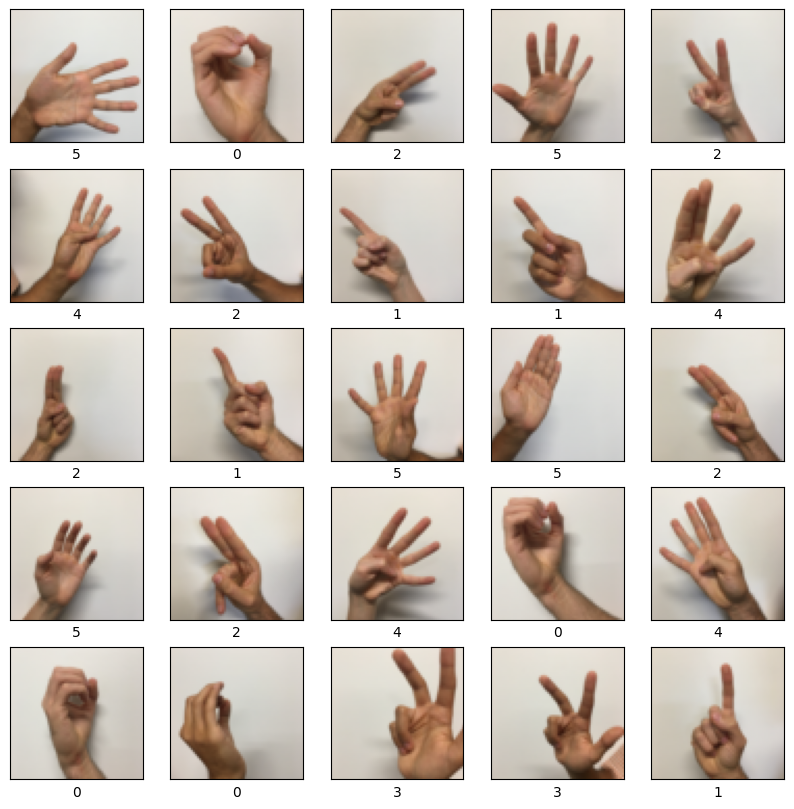

In [55]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(Y_train_orig[0][i])
plt.show()

**构建卷积神经网络的模型**

In [47]:
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(64, 64, 3),padding='same'))
model.add(layers.MaxPooling2D((2, 2),padding='same'))
model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2),padding='same'))

In [48]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 8)           │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 16)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,392 (5.44 KB)

 Trainable params: 1,392 (5.44 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.add(layers.Flatten())
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(6))

In [50]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 8)           │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │          65,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,046 (261.90 KB)

 Trainable params: 67,046 (261.90 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8592 - loss: 0.4389 - val_accuracy: 0.7583 - val_loss: 0.8348
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8667 - loss: 0.4253 - val_accuracy: 0.7750 - val_loss: 0.7967
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8865 - loss: 0.3941 - val_accuracy: 0.7750 - val_loss: 0.7926
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8924 - loss: 0.4001 - val_accuracy: 0.7833 - val_loss: 0.7795
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8876 - loss: 0.3951 - val_accuracy: 0.7750 - val_loss: 0.7702
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9096 - loss: 0.3518 - val_accuracy: 0.8000 - val_loss: 0.6855
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9129 - loss: 0.3620 - val_accuracy: 0.6750 - val_loss: 0.8108
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8701 - loss: 0.3871 - val_accuracy: 0.7833 - 

**训练集和测试集上的准确率变化**

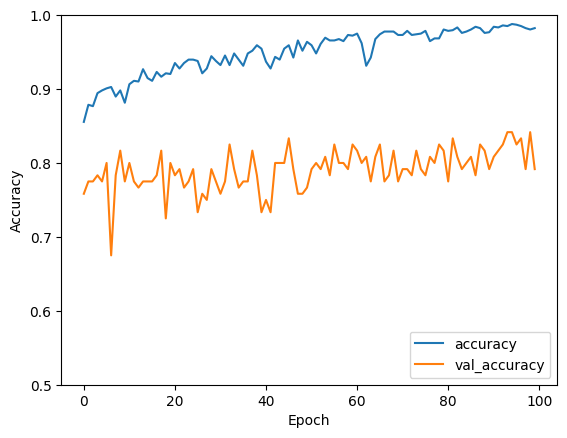

In [75]:
plt.plot(history.history['accuracy'], label='accuracy')  #accuracy（准确率）是指模型在训练数据集上的预测准确性
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')  #val_accuracy是模型在验证数据集（validation_data）上的准确率
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

**两个数据集上的损失值变化图**

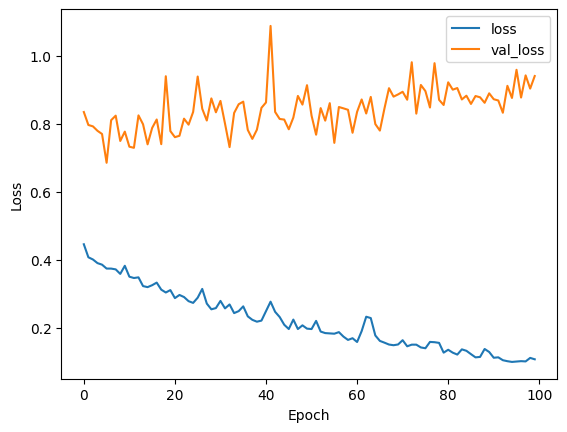

In [76]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [77]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)  #测试集的评估

4/4 - 0s - 10ms/step - accuracy: 0.7917 - loss: 0.9407
